# Furijeove transformacije &ndash; uvodni primer

Funkcija $f(t)$ čiji je argument vreme $t$ se naziva **signal**. Signal se, sa jedne strane, može predstaviti svojom jačinom u zavisnosti od vremena. Ovakvo predstavljanje se vrši u **vremenskom domenu** (eng. *time domain*). Sa druge strane, nekad je zgodno analizirati koliko je svaka frekvencija zastupljena u tom signalu, pa tada govorimo o predstavljanju signala u **frekvencijskom domenu** (eng. *frequency domain*). Oba prikaza su samo dva načina predstavljanja iste funkcije. **Furijeova transformacija** omogućava prelazak iz vremenskog u frekvencijski domen, a **inverzna Furijeova transormacija** prelazak iz frekvencijskog u vremenski domen.

<img src="assets/time_frequency.gif" width="400px">

Posmatrajmo proizvoljnu sinusoidu $$a \sin(2\pi f_0 t + \phi)$$. 

Ako uvedemo oznaku $\omega_0 = 2\pi f_0$, sinusoida se može napisati i u obliku $$a \sin(\omega_0 t + \phi)$$. 


- Parametar $a$ se naziva **amplituda**.
- Parametar $f_0$ predstavlja **osnovnu frekvenciju**, a $\omega_0$ **ugaonu frekvenciju** odnosno broj obrtaja koji neka tačka, krećući se po krugu, može obići za jednu sekundu. 
- Parametar $\phi$ predstavlja **fazu**, odnosno meru koliko je sinusoida pomerena na $x$-osi u odnosu na koordinatni početak. Primetimo i da je grafik kosinusne funkcije takođe sinusoida, pomerena po $x$-osi za vrednost $\pi / 2$. U literaturi se često oznake poput $2f_0$, $3f_0$, odnosno $nf_0$, nazivaju drugim, trećim, odnosno **harmonicima** višeg reda.

Furijeova transformacija funkcije $f$ se najčešće označava sa $\hat{f}$. Pretpostavimo da je funkcija $f: \mathbb{R} \rightarrow \mathbb{C}$ apsolutno integrabilna. Furijeova transformacija je funkcija $$\hat{f}(u) = \int_{-\infty}^{\infty} f(t) e^{2\pi i u t}dt.$$ Nasuprot njoj, definiše se inverzna Furijeova transformacija sa $$f(t) = \int_{-\infty}^{\infty} \hat{f}(u) e^{-2\pi i u t}dt.$$ Ovde je sa $t$ predstavljeno vreme, a sa $u$ frekvencija. 

Međutim, u praksi se najčešće govori o **diskretnoj Furijeovoj transformaciji**, budući da je funkcija poznata samo na konačnom skupu tačaka. Tada se, prirodno, integral zamenjuje odgovarajućom sumom. Neka niz $f_0, f_1, \dots, f_{N-1}$, predstavlja niz od $N$ kompleksnih brojeva, koji može predstavljati vrednosti funkcije $f$ u nekih $N$ tačaka. Diskretna Furijeova transformacija transformiše polazni niz u novi niz kompleksnih brojeva $\hat{f}_0, \hat{f}_1, \dots, \hat{f}_{N-1}$ i data je $$\hat{f}_k = \sum_{n=0}^{N-1} f_n e^{-2\pi ikn/N}.$$ Imajući u vidu Ojlerov identitet $e^{i\phi} = \cos \phi + i \sin \phi$, prethodni izraz se može napisati u obliku $$\hat{f}_k = \sum_{n=0}^{N-1} f_n \left( \cos \frac{2\pi kn}{N} - i \sin \frac{2\pi kn}{N} \right).$$

Nasuprot tome, može se definisati **inverzna diskretna Furijeova** transformacija sa $$f_n=\frac{1}{N} \sum_{k=0}^{N-1} \hat{f}_k e^{2\pi i kn/N}.$$

Ako se na svakih $T_s$ sekundi vrši merenje signala, $T_s$ se naziva **period uzrokovanja**. **Frekvencija uzrokavanja** $F_s$ je obrnuto srazmerna periodu uzrokovanja i izražena je u hercima. Važi da je $F_s = 1 / T_s$. Na primer, ako je $T_s = 0.5$ s, tada je $F_s = 1 / 0.5 = 2$ Hz, odnosno signal se meri dva puta u sekundi. Ako je ukupan broj uzoraka jednak $N$, tada se $T = NT_s$ naziva **vreme uzrokovanja**. **Frekvencijka rezolucija** je vrednost $\Delta f = F_s / N$, a $k$-ti **frekvencijski podeok** vrednost $k \Delta f$.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from numpy import fft

Posmatrajmo signal $$f(t) = 2\sin (2\pi t) + 3 \sin (44\pi t) + \epsilon$$ gde je $\epsilon$ šum koji ćemo generisati proizvoljno iz standardne normalne raspodele. Neka je signal izmeren 6000 puta tokom 100 sekundi. 

Možemo zaključiti da je $N = 6000$ i $T = 100$. Odatle je $T_s = T / N = 1 / 60$ s i $F_s = 1 / T = 60$ Hz, što znači da se signal meri 60 puta u sekundi.

In [2]:
N = 6000
T = 100
Ts = T/N
Fs = 1/Ts

Dalje ćemo kreirati ekvidistantnu mrežu vremenskih trenutaka u kojima je vršeno uzorkovanje signala. To će biti mreža sa 6000 tačaka u intervalu $[0, 100]$.

In [3]:
t = np.linspace(0, T, N, endpoint=True)

Potom ćemo definisati funkciju `signal` koja računa vrednosti signala u trenucima određenim argumentom `t`. 

In [4]:
def signal(t):
    n = t.shape[0]
    noise = np.random.randn(n)
    return 2*np.sin(2*np.pi*t) + 3*np.sin(44*np.pi*t) + noise

In [5]:
f = signal(t)

Prikažimo grafik signala u celosti, a zatim i samo u toku prvih 5 sekundi zbog boljeg uvida u formu signala.

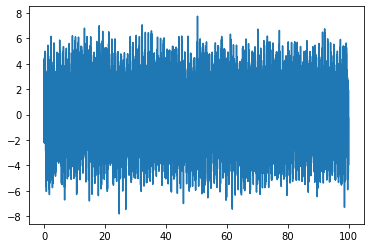

In [6]:
plt.plot(t, f)
plt.show()

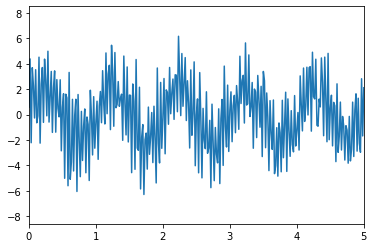

In [7]:
plt.plot(t, f)
plt.xlim(0, 5)
plt.show()

Furijeove koeficijente diskretne funkcije $f$ možemo dobiti pomoću `fft` metoda paketa `fft`.

In [8]:
c = fft.fft(f)

Dobijeni koeficijenti su kompleksni brojevi i njihov broj odgovara broj uzoraka funkcije $f$.

In [9]:
print('Tip koeficijenata:', c.dtype)
print('Broj koeficijenata:', c.shape)
print('Prvih deset koeficijenata:\n', c[:10])

Tip koeficijenata: complex128
Broj koeficijenata: (6000,)
Prvih deset koeficijenata:
 [-13.13290958  +0.j          55.01933017-121.72794295j
  30.28838677 -35.15136521j -92.56591794  -7.60065337j
  -7.42837507 +13.41610224j -35.0861433  +21.24118323j
  -5.18633581 -92.30724609j  46.67128842 +47.65117726j
 -16.78673327 +74.4561388j    8.59093596 -25.36972772j]


Generišimo sada niz frekvencija čije vrednosti će predstavljati $x$-osu u frekvencijskom domenu. Za ovaj zadatak možemo koristiti funkciju `fftfreq` čiji su argumenti, redom,  $N$ i $T_s$ (drugi argument se često označava i sa $1 / F_s$). 

In [10]:
freq = fft.fftfreq(N, 1.0/Fs)

U slučaju naše funkcije, generisaće se redom vrednosti najpre u intervalu $[0, 30)$, a zatim u intervalu $[-30, 0)$. 

In [11]:
freq.shape

(6000,)

Možemo pogledati prvih 10 frekvencija frekvencijske ose, kao i poslednjih 10.

In [12]:
freq[0:10]

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09])

In [13]:
freq[-10:]

array([-0.1 , -0.09, -0.08, -0.07, -0.06, -0.05, -0.04, -0.03, -0.02,
       -0.01])

U zajednici koja se bavi obradom signala, prikazuju se dva spektra dobijenih koeficijenata: `spektar magnituda` i `spektar faza`.

Spektar magnituda je grafik koji duž x-ose ima frekvencije frekvencijskog domena, a duž y-ose vrednost magnituda (modula) koeficijenata. 

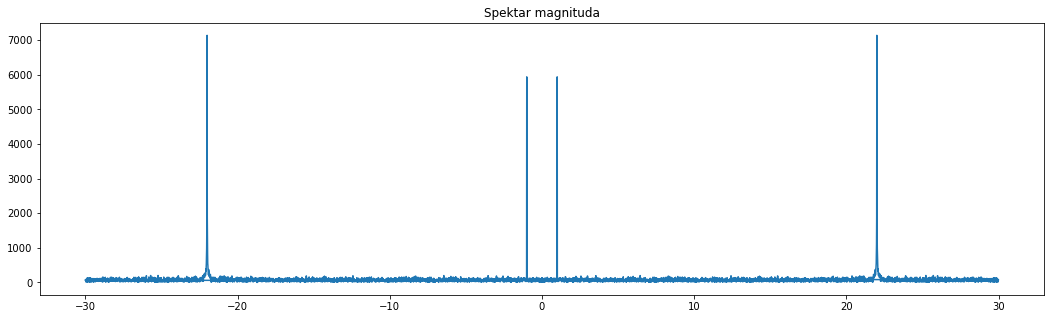

In [14]:
plt.figure(figsize=(18,5))
plt.title('Spektar magnituda')
plt.plot(freq, np.abs(c))
plt.show()

Često se spektar magnituda crta korišćenjem takozvanih *stem* grafikona.

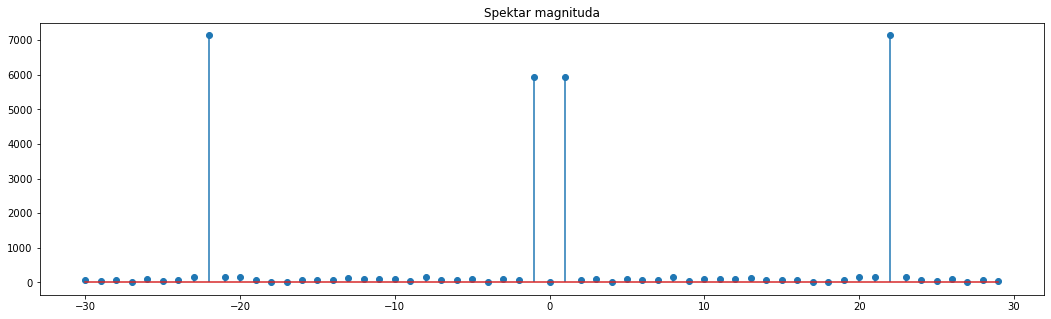

In [15]:
plt.figure(figsize=(18,5))
plt.title('Spektar magnituda')
plt.stem(freq[::100], np.abs(c)[::100], use_line_collection=True)
plt.show()

Proređivanja koja su korišćenja prilikom iscrtavanja (svaki 100ti podeok) su čisto tehničke prirode, da bi generisani grafici bili pregledniji i brže nacrtani. 

`Spektar faza` je grafik koji duž x-ose ima frekvencije frekvencijskog domena, a duž y-ose vrednost argumenata koeficijenata.

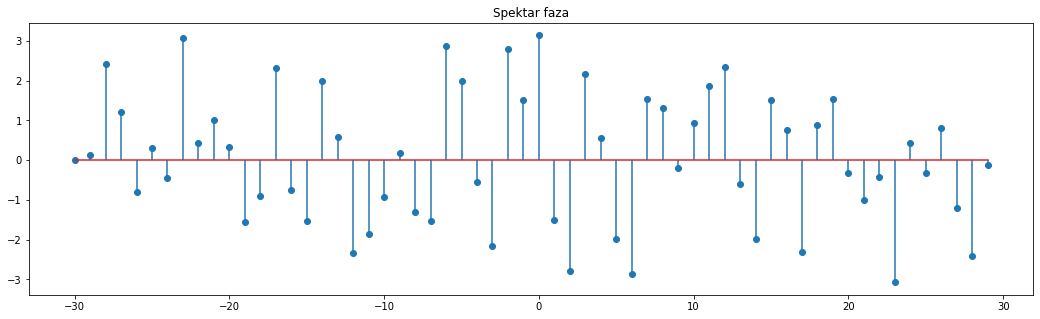

In [16]:
plt.figure(figsize=(18,5))
plt.title('Spektar faza')
plt.stem(freq[::100], np.angle(c)[::100], use_line_collection = True)
plt.show()

Ako pažljivo pogledamo spektar magnituda, izdvajaju se pikovi u tačkama $1$, $-1$, $22$ i $-22$. Ovakav rezultat je očekivan jer je naša funkcija suma faktora $\sin (2\pi \cdot 1 \cdot  t)$ i $\sin (2\pi \cdot 22 \cdot  t)$ sa osnovnim frekvencijama $1$ i $22$. Time smo dobili potvrdu da Furijeova transformacija izdvaja frekvencije prisutne u signalima. 

Jedna od čestih radnji u frekvencijskom spektru funkcije je eliminacija šuma. Tako, na primer, uvidom u frekvencije prisutne u našem signalu šum možemo eliminisati anuliranjem koeficijenata kod kojih je magnituda manja od 1000.

In [17]:
mask = np.abs(c) > 1000
c_filtered = c * mask

Sada možemo vratiti filtrirani signal iz frekvencijskog u vremenski domen korišćenjem funkcije `ifft` kojom se realizuje inverzna Furijeova transformacija.

In [18]:
f_filtered = fft.ifft(c_filtered)

In [19]:
f_filtered.dtype

dtype('complex128')

Dalje ćemo prikazati vrednosti novodobijene filtrirane funkcije. Kako je rezultat niz kompleksnih brojeva, pratićemo samo realne vrednosti.

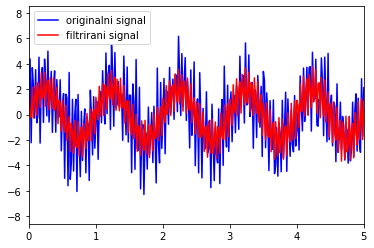

In [20]:
plt.xlim(0, 5)
plt.plot(t, f, color='blue', label='originalni signal')
plt.plot(t, f_filtered.real, color='red', label='filtrirani signal')

plt.legend(loc='best')
plt.show()